In [23]:
from multiprocessing import Process, Queue
from threading import Thread
import time

In [24]:
# 실행 함수 정의
def work(id, start, end, result):
    total = 0
    for i in range(start, end):
        total += i
    result.append(total)
    return


### 1개 진행

In [43]:
if __name__ == "__main__":
    START, END = 0, 100000000
    result = list()
    th1 = Thread(target=work, args=(1, START, END, result))
    
    th1.start()
    th1.join()
    
    result1 = sum(result)
    result1_time = time.time() - start


In [44]:
result1, result1_time

(4999999950000000, 8.64128851890564)

### 2개 분할 진행

In [51]:
start = time.time()  # 시작 시간 저장

if __name__ == "__main__":
    START, END = 0, 100000000
    result = list()
    th1 = Thread(target=work, args=(1, START, END//2, result))
    th2 = Thread(target=work, args=(2, END//2, END, result))
    
    th1.start()
    th2.start()
    th1.join()
    th2.join()
    
    result2 = sum(result)
    result2_time = time.time() - start

In [52]:
result2, result2_time

(4999999950000000, 7.307785987854004)

### 3개 분할 진행

In [57]:
start = time.time()  # 시작 시간 저장

if __name__ == "__main__":
    START, END = 0, 100000000
    result = list()
    th1 = Thread(target=work, args=(1, START, END//3, result))
    th2 = Thread(target=work, args=(2, END//3, END//3, result))
    th3 = Thread(target=work, args=(3, END//3, END, result))
    
    th1.start()
    th2.start()
    th3.start()
    th1.join()
    th2.join()
    th3.join()
    
    result3 = sum(result)
    result3_time = time.time() - start

In [58]:
result3, result3_time

(4999999950000000, 8.680689573287964)

### 4개 분할 진행

In [53]:
start = time.time()  # 시작 시간 저장

if __name__ == "__main__":
    START, END = 0, 100000000
    result = list()
    th1 = Thread(target=work, args=(1, START, END//4, result))
    th2 = Thread(target=work, args=(2, END//4, END//4, result))
    th3 = Thread(target=work, args=(3, END//4, END//4, result))
    th4 = Thread(target=work, args=(4, END//4, END, result))
    
    th1.start()
    th2.start()
    th3.start()
    th4.start()
    th1.join()
    th2.join()
    th3.join()
    th4.join()
    
    result4 = sum(result)
    result4_time = time.time() - start

In [54]:
result4, result4_time

(4999999950000000, 7.892456531524658)

### 5개 분할 진행

In [77]:
start = time.time()  # 시작 시간 저장

if __name__ == "__main__":
    START, END = 0, 100000000
    result = list()
    th1 = Thread(target=work, args=(1, START,  END//5*1, result))
    th2 = Thread(target=work, args=(2, END//5*1, END//5*2, result))
    th3 = Thread(target=work, args=(3, END//5*2, END//5*3, result))
    th4 = Thread(target=work, args=(4, END//5*3, END//5*4, result))
    th5 = Thread(target=work, args=(5, END//5*4, END, result))
    
    th1.start()
    th2.start()
    th3.start()
    th4.start()
    th5.start()
    th1.join()
    th2.join()
    th3.join()
    th4.join()
    th5.join()

    result5 = sum(result)
    result5_time = time.time() - start

Exception in thread Thread-79:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-72-bdb0ca93ae8e>", line 7, in work
    result.put(total)
AttributeError: 'list' object has no attribute 'put'

Exception in thread Thread-80:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-72-bdb0ca93ae8e>", line 7, in work
    result.put(total)
AttributeError: 'list' object has no attribute 'put'

Exception in thread Thread-76:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Pr

In [78]:
result5, result5_time

(0, 7.268356561660767)

### 결과 비교

In [79]:
result_value = [1, 2, 3, 4, 5]
result_times = [result1_time, result2_time, result3_time, result4_time, result5_time]

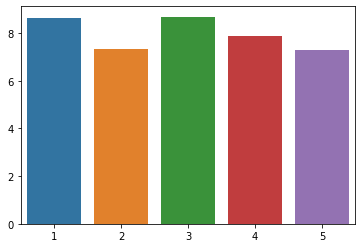

In [80]:
import seaborn as sns
sns.barplot(x= result_value, y =result_times)

In [72]:
from multiprocessing import Process, Queue

def work(id, start, end, result):
    total = 0
    for i in range(start, end):
        total += i
    result.put(total)
    return

if __name__ == "__main__":
    START, END = 0, 100000000
    result = Queue()
    th1 = Process(target=work, args=(1, START, END//2, result))
    th2 = Process(target=work, args=(2, END//2, END, result))
    
    th1.start()
    th2.start()
    th1.join()
    th2.join()

    result.put('STOP')
    total = 0
    while True:
        tmp = result.get()
        if tmp == 'STOP':
            break
        else:
            total += tmp
#     result_n = sum(total)
    print(f"Result: {total}")

Result: 0


In [76]:
END//4*2

50000000